In [0]:
import os
import numpy as np
import cv2
import h5py
import zipfile
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd "drive/My Drive/BTP"

/content/drive/My Drive/BTP


In [0]:
with zipfile.ZipFile('test_set.zip', 'r') as zip_read:
  zip_read.extractall(os.getcwd())

In [0]:
a = np.array([2,3,4,7,1,9,6])
idx = np.random.choice(a, size = 4, replace=False)
print(idx)

[7 3 6 9]


In [0]:
b = np.arange(1,20)
print(b)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [0]:
b[idx]

array([ 8,  4,  7, 10])

In [0]:
idx = [1,2,3]
l = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
print(l[idx])

TypeError: list indices must be integers or slices, not list

In [0]:
b = np.arange(1,20)
c = np.arange(1,39,2)
print(c)
d = np.concatenate((b,c), axis=1)
print(d)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37]


AxisError: axis 1 is out of bounds for array of dimension 1

In [0]:
mypath='data/capture'
files = os.listdir(mypath)
print(files[0])

img000001.jpg


In [0]:
if os.path.isfile(os.path.join(mypath, files[0])):
    img = cv2.imread(os.path.join(mypath, files[0]))
    print('yes')

yes


In [0]:
img.shape

(512, 512, 3)

In [0]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[7,8,9],[10,11,12]])
c = np.vstack((a,b))
print(c)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [0]:
c[3,:]

array([10, 11, 12])

In [0]:
x_file = 'data/final_resized/train_set.hdf5'
h5_reader = h5py.File(x_file)

In [0]:
print(list(h5_reader))
x = h5_reader['train_img']
x = np.array(x)

['train_img']


In [0]:
print(x.shape)
print(type(x))

(26399, 128, 128, 3)
<class 'numpy.ndarray'>


In [0]:
x = x.astype('float32')

In [0]:
print(np.isnan(x))

In [5]:
x_file = 'test_set.hdf5'
h5_reader = h5py.File(x_file, 'r')
print(h5_reader.keys())
x_test = h5_reader['test_img']
x_test = np.array(x_test)
h5_reader.close()
x_test = x_test.astype('float32')
x_test /= 255

KeysView(<HDF5 file "test_set.hdf5" (mode r)>)


<class 'numpy.ndarray'>
(128, 128, 3)


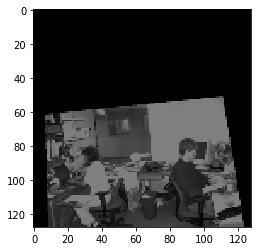

In [9]:
print(type(x_test[2]))
print(x_test[2].shape)
plt.imshow(x_test[2])

In [0]:
r = x_test[:,:,0]
g = x_test[:,:,1]
b = x_test[:,:,2]

In [11]:
print(np.array_equal(r,g))

False


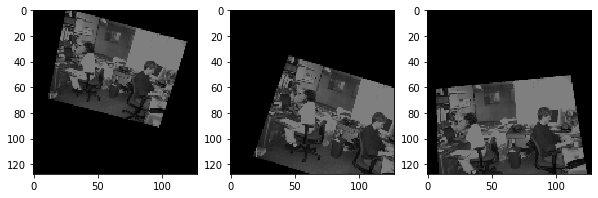

In [18]:
fig = plt.figure(figsize=(10, 10))
rows, columns = 1, 3
fig.add_subplot(rows, columns, 1)
plt.imshow(x_test[0])
fig.add_subplot(rows, columns, 2)
plt.imshow(x_test[1])
fig.add_subplot(rows, columns, 3)
plt.imshow(x_test[2])

In [0]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0  77464      0 --:--:-- --:--:-- --:--:-- 77464


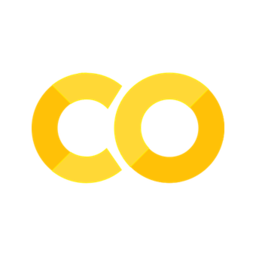

In [22]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)